In [1]:
import pandas as pd
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
df = pd.read_csv('d:/data/project/project_keras.csv')
df.head()

wave  region1  region2  region3  region4  region5  region6  region7  \
0     1        1        0        0        0        0        0        0   
1     7        1        0        0        0        0        0        0   
2     8        1        0        0        0        0        0        0   
3     9        1        0        0        0        0        0        0   
4    10        1        0        0        0        0        0        0   

   family_member  year_born  ...  marriage4  marriage5  marriage6  religion  \
0              1       1936  ...          0          0          0         2   
1              1       1936  ...          0          0          0         2   
2              1       1936  ...          0          0          0         2   
3              1       1936  ...          0          0          0         2   
4              1       1936  ...          0          0          0         2   

   company_size  reason_none_worker  male  female  label  income  
0           NaN                 8.0     0       1      0   614.0  
1           NaN                10.0     0       1      0   896.0  
2           NaN                10.0     0       1      0  1310.0  
3           NaN                 1.0     0       1      0  2208.0  
4           NaN                10.0     0       1      0   864.0  

[5 rows x 32 columns]

In [2]:
df.columns

Index(['wave', 'region1', 'region2', 'region3', 'region4', 'region5',
       'region6', 'region7', 'family_member', 'year_born', 'education_level1',
       'education_level2', 'education_level3', 'education_level4',
       'education_level5', 'education_level6', 'education_level7',
       'education_level8', 'education_level9', 'marriage1', 'marriage2',
       'marriage3', 'marriage4', 'marriage5', 'marriage6', 'religion',
       'company_size', 'reason_none_worker', 'male', 'female', 'label',
       'income'],
      dtype='object')

In [3]:
df = df.fillna(0)

In [4]:
train_cols = ['wave', 'region1', 'region2', 'region3', 'region4', 'region5',
       'region6', 'region7', 'family_member', 'year_born', 'education_level1',
       'education_level2', 'education_level3', 'education_level4',
       'education_level5', 'education_level6', 'education_level7',
       'education_level8', 'education_level9', 'marriage1', 'marriage2',
       'marriage3', 'marriage4', 'marriage5', 'marriage6', 'religion',
       'company_size', 'reason_none_worker', 'male', 'female',
       'income']
X = df[train_cols]
y = df['label']

In [5]:
len(train_cols)

31

In [6]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data = X_sample,columns=train_cols)
y_samp = pd.DataFrame(data = y_sample,columns=['label'])
df_samp = pd.concat([X_samp,y_samp],axis=1)

In [7]:
X = X_samp[train_cols]
y = y_samp['label']

d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\

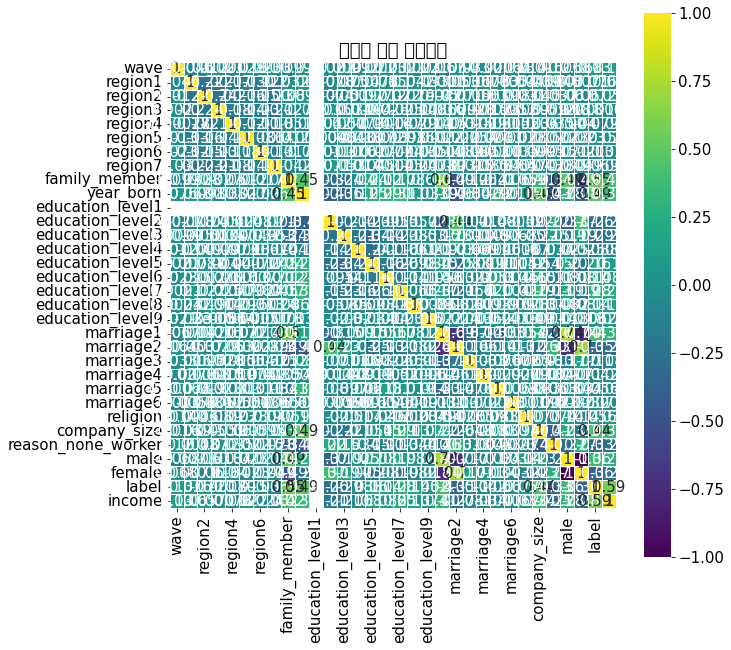

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=1, square=True,
annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('변수들 간의 상관관계') 
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=7)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),),activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)
hist = model.fit(X_train_scaled[:1000], y_train[:1000], epochs=20,callbacks=[early_stopping],verbose=0)

Epoch 1/20
32/32 [==============================] - 1s 4ms/step - loss: 0.1577 - accuracy: 0.7820
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.8650
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0850 - accuracy: 0.8820
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0660 - accuracy: 0.9120
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9470
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9690
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9780
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.9820
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.9910
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.9890
Epoch 11/20
32/32 [

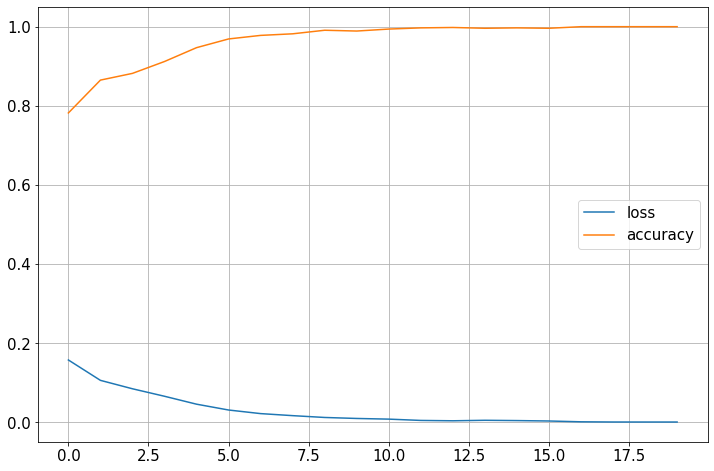

In [14]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.grid()
plt.show()

In [15]:
scores = model.evaluate(X_train_scaled[:1000], y_train[:1000])
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) 
scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) 


32/32 [==============================] - 0s 3ms/step - loss: 6.6074e-04 - accuracy: 1.0000
[0.0006607405957765877, 1.0]
accuracy: 100.00%
432/432 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9579
[0.03126612678170204, 0.9579229354858398]
accuracy: 95.79%


In [19]:
import numpy as np 
test_set = [[5,0,1,0,0,0,0,0,4,1977,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,3,0,1,0,30000]]
test_set = scaler.transform(test_set)
model.predict(test_set)

1/1 [==============================] - 0s 18ms/step


d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.]], dtype=float32)

In [17]:
model.save('d:/data/project')


INFO:tensorflow:Assets written to: d:/data/project\assets


In [18]:
import joblib
joblib.dump(scaler,'d:/data/project/scaler.model')

['d:/data/project/scaler.model']